# 1- Implementation a Neural Network
In this problem you should train an artificial neural network (MLP and RBF) for classification of the given dataset.<br>
you should fill the missing sections to complete your neural network implementation.<br>
in this exercise you will:
- Tune the learning rate and regularization weight
- Implement the loss function for MLP
- Implement the forward pass and backward pass 
- visualize the train and validation accuracy versuse iteration
- visualize the weights neurons

In [ ]:
# initialization

import numpy as np
import matplotlib.pyplot as plt

from neural_net import MLPNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## 1-1-1 Create a toy dataset
In this section we create a toy dataset containing 5 samples with 5 features.
The network has 6 neurons in the hidden layer and there are 3 classes in the output.
MLPNet class in the file neural_net.py will be used to instantiate our network . We use toy dataset with small size to check your implementaion and to see what happens to network weights during training.

In [2]:
# Create our network and toy dataset

features = 5
hidden_size = 6
classes = 3
inputs = 5
np.random.seed(0)

net = MLPNet(features, hidden_size, classes, std=1e-1)
X = 10 * np.random.randn(inputs, features)
y = np.array([1, 0, 0, 2, 1])

## 1-1-2- Forward pass
To run the following section, you should complete the loss function in the neural_net.py to compute scores . The output is a 5*3 matrix that contains the class score for each sample.

In [3]:
scores = net.loss(X)
print ('Your scores:\n',scores)

Your scores:
 [[-0.          0.0200569  -0.        ]
 [-0.          0.06109767 -0.        ]
 [-0.          0.03057286 -0.        ]
 [-0.          0.00847019 -0.        ]
 [-0.          0.08251664 -0.        ]]


## 1-1-3- Forward pass
Now you should complete the second missing part in loss function in the neural_net.py , the output shows the loss of your network

In [4]:
loss, _ = net.loss(X, y, reg=0.1)
print("your network loss is:",loss)

your network loss is: 4.868481579407079


## 1-1-4- Backward pass
compute the gradient according to weights and biases. 

In [5]:
loss, grads = net.loss(X, y, reg=0.1)
print('grads of W1\n',grads['W1'])
print('grads of b1\n',grads['b1'])
print('grads of W2\n',grads['W2'])
print('grads of b2\n',grads['b2'])

grads of W1
 [[ 6.28066204e-02  8.00314417e-03  1.95747597e-02 -3.15038766e-02
   1.79343580e-01 -1.01928602e-01]
 [ 5.41770902e-02 -3.02714417e-03 -3.08281541e-03 -8.93206676e-02
   1.84335005e-01 -5.33535305e-02]
 [ 4.77777520e-02  2.43350033e-03  8.56777207e-03 -8.35991725e-02
   1.97828922e-01 -1.12485357e-01]
 [ 7.09066820e-02 -1.70819148e-02 -5.10597963e-02 -1.66173447e-01
   3.50765758e-01 -1.08649453e-01]
 [ 8.42996223e-02 -2.90873135e-02  2.49652638e-04 -1.11616504e-01
   2.31347074e-01 -8.04878953e-02]]
grads of b1
 [ 0.06796661  0.         -0.00101844 -0.18845493  0.35061008 -0.10622646]
grads of W2
 [[ 0.00309895  0.57688308 -0.01775571]
 [-0.03961593 -0.00695824  0.00312698]
 [ 0.02460581  0.02399545 -0.00774654]
 [-0.00604606  0.30153401 -0.02840036]
 [-0.0341254   0.62243908 -0.01019304]
 [-0.00876149  0.06192436  0.01554981]]
grads of b2
 [0.         1.79728574 0.        ]


## 1-1-5- Train the network
Fill the missing section in train and predict function of MLPNet class . After you correctly implement those function you build a two layer neural network that can feed data to it. The result of the following section shows Final training loss of your network and training loss versus iteration .

iteration 0 / 100: loss 4.817172
Final training loss:  4.559049398118488


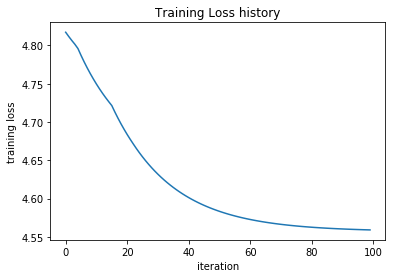

In [6]:
net = MLPNet(features, hidden_size, classes, std=1e-1)
stats = net.train(X, y, X, y,
            alpha=1e-3, reg=1e-5,
            num_iters=100)

print ('Final training loss: ', stats['loss_train'][-1])

# plot the loss history
plt.plot(stats['loss_train'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## 1-1-6- Load Cancer Diagnosis dataset
In this section we use a real dataset.change root variable in dataloader.py to your dataset path.

In [7]:
from dataloader import select_features
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
import matplotlib
val_num = 45
train_num = 200
test_num = 40
train_data, train_labels, test_data, test_labels,\
    class_names, n_train, n_test, n_class, n_features = select_features()


# Subsample the data
mask = range(train_num, n_train)
X_val = train_data[mask]
y_val = train_labels[mask]
mask = range(train_num)
X_train = train_data[mask]
y_train = train_labels[mask]
mask = range(test_num)
X_test = test_data[mask]
y_test = test_labels[mask]

print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (200, 1970)
Train labels shape:  (200,)
Validation data shape:  (45, 1970)
Validation labels shape:  (45,)
Test data shape:  (40, 1970)
Test labels shape:  (40,)


## 1-1-7- Train 
For training our neural network we will use SGD(Stochastic Gradient descent).The loss of your network must decrease during epochs.

In [16]:
input_size = n_features
print(input_size)
hidden_size = 50
num_classes = 7
net = MLPNet(input_size, hidden_size, num_classes,std=1e-2)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=50,
            alpha=1e-3, alpha_decay=0.95,
            reg=0.3)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)


1970
iteration 0 / 1000: loss 52.649400
iteration 100 / 1000: loss 41.302614
iteration 200 / 1000: loss 39.476337
iteration 300 / 1000: loss 40.183191
iteration 400 / 1000: loss 37.777599
iteration 500 / 1000: loss 39.324688
iteration 600 / 1000: loss 39.432581
iteration 700 / 1000: loss 39.961054
iteration 800 / 1000: loss 39.129032
iteration 900 / 1000: loss 38.728153
Validation accuracy:  0.37777777777777777


the below plots show loss during epochs and training and validatino accuracy versus epochs. The loss should decreas over time. ***according to second plot what is the best iteration number to terminate training?***

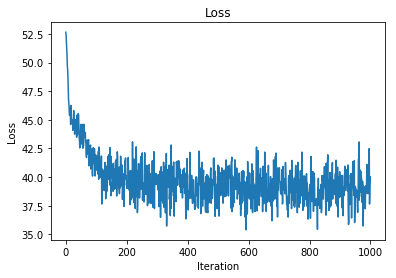

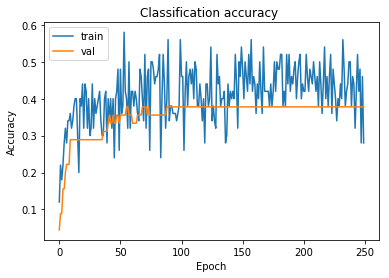

In [17]:
# Plot the loss function and train / validation accuracies
plt.plot(stats['loss_train'])
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.plot(stats['train_acc'], label='train')
plt.plot(stats['val_acc'], label='val')
plt.title('Classification accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 1-1-8- Tune network's hyperparameters
As you know hidden layer size, learning rate and weight regularization are important in developing a neural network so you should tune them and get a better result and report the best hyperparameters.

In [ ]:
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=30000, batch_size=50,
            alpha=1e-4, alpha_decay=0.95,
            reg=0.5)

best_net = None # store the best model into this 
#################################################################################
# Tune hyperparameters with validation set and store your best model in best_net#
#################################################################################
pass
#################################################################################
#                                END OF YOUR CODE                               #
#################################################################################


## 1-1-9- Test
Now you find the best hyperparameters, Let's test your network on test dataset and evaluate your accuracy.
**our baseline is 10% and for each 1% you get 1 extra bonus point**

In [13]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print ('Test accuracy: ', test_acc)

NameError: name 'best_net' is not defined

## 1-2-1- Scikit-learn without normalization
In this section you become familiar with Scikit-learn and implement an MLP network with that. Find the best parameters for best accuracy

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier


## 1-2-2- Test acc
test your network with test dataset and report accuracy

## 1-2-3- Scikit-learn with normalization
In this section we use previous code with just one change. befor you feed data to network normalized them . 

## 1-2-4- Test accuracy
Test again your network with test dataset.Do you see any progress in test accuracy against result of prevouis section?